<font size="24">FUTURE SALES FORECASTING </font>

**File description**:

<font size="3">

- **sales_train.csv** : The training set. Daily historical data from January 2013 to October 2015.
- **test.csv**: The test set. You need to forecast the sales for these shops and products for November 2015.
- **sample_submission**: A sample submission file in the correct format.
- **items.csv**: Supplemental information about the items/products.
- **item_categories**: Supplemental information about the items categories.
- **shops.csv**: Supplemental information about the shops.

</font>

**Data fields**:

<font size="3">

- **ID**:  An Id that represents a (Shop, Item) tuple within the test set
- **shop_id**:  Unique identifier of a shop
- **item_id**: Unique identifier of a product
- **item_category_id**: Unique identifier of item category
- **item_cnt_day**: Number of products sold. You are predicting a monthly amount of this measure
- **item_price**: Current price of an item
- **date**: Date in format dd/mm/yyyy
- **date_block_num**: A consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- **item_name**: Name of item
- **shop_name**: Name of shop
- **item_category_name**: Name of item category

</font>

In [1]:
import pandas as pd
import warnings
import copy
from src.data.make_dataset import ETL,DQC
from config import test_path, shops_path, sales_path, items_path, item_categories_path

warnings.filterwarnings("ignore")

In [3]:
item_categories = ETL(item_categories_path)
items = ETL(items_path)
sales = ETL(sales_path)
shops = ETL(shops_path)
test = ETL(test_path)

84 rows and 2 columns has been read from item_categories.csv
22170 rows and 3 columns has been read from items.csv
2935849 rows and 6 columns has been read from sales_train.csv
60 rows and 2 columns has been read from shops.csv
214200 rows and 3 columns has been read from test.csv


<font size = 3>

**item categories**:

</font>

In [4]:
item_categories.dqc.statistic()

Information about data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None


Some examples of data:

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9


Number of unique data:

item_category_name    84
item_category_id      84
dtype: int64


Number of dubl

In [5]:
item_categories_df = item_categories.dqc.get_data()

In [6]:
item_categories_df.loc[item_categories_df['item_category_id'].isin([33, 34, 43, 44, 69, 70, 75, 76, 77, 78])]

,item_category_name,item_category_id
33,Карты оплаты - Live!,33
34,Карты оплаты - Live! (Цифра),34
43,Книги - Аудиокниги,43
44,Книги - Аудиокниги (Цифра),44
69,Подарки - Сувениры,69
70,Подарки - Сувениры (в навеску),70
75,Программы - Для дома и офиса,75
76,Программы - Для дома и офиса (Цифра),76
77,Программы - Обучающие,77
78,Программы - Обучающие (Цифра),78


<font size = 3>

<b>'Цифра' means that this item sold in digital format
'В навестку' means that this item goes as a gift or at a discount to the main product</b>


</font>

<font size = 3>

**Items**:

</font>

In [7]:
items.dqc.statistic()

Information about data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None


Some examples of data:

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   
5  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6           ***УДАР ПО ВОРОТАМ (UNI)               D        6   
7         ***УДАР ПО ВОРОТАМ-2 (UN

<font size = 3>

**Sales_train**:

</font>

In [8]:
sales.dqc.statistic()

Information about data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


Some examples of data:

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013     

In [9]:
sales.dqc.describe_matrix(column_list=['date', 'item_price', 'item_cnt_day'])

                  count        mean          std   min    25%    50%    75%  \
item_price    2935849.0  890.853233  1729.799631  -1.0  249.0  399.0  999.0   
item_cnt_day  2935849.0    1.242641     2.618834 -22.0    1.0    1.0    1.0   

                   max  
item_price    307980.0  
item_cnt_day    2169.0  


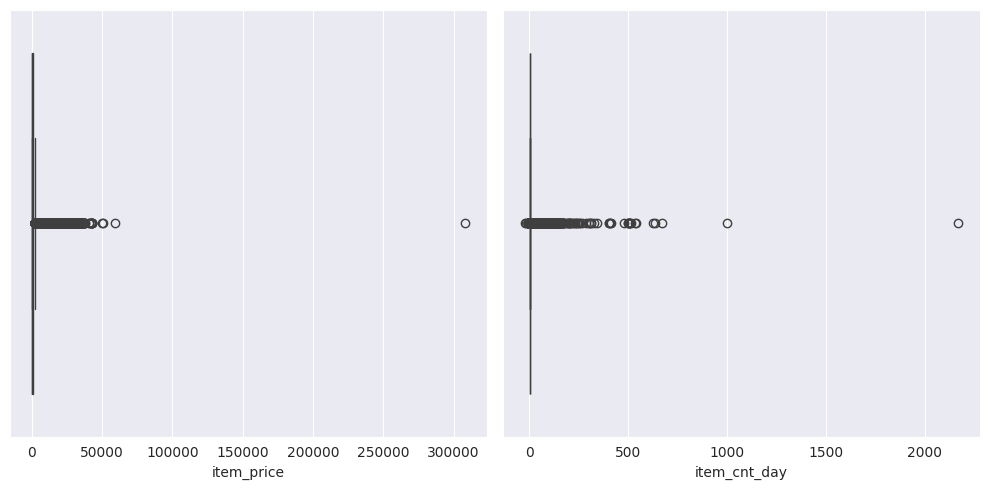

In [10]:
sales.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

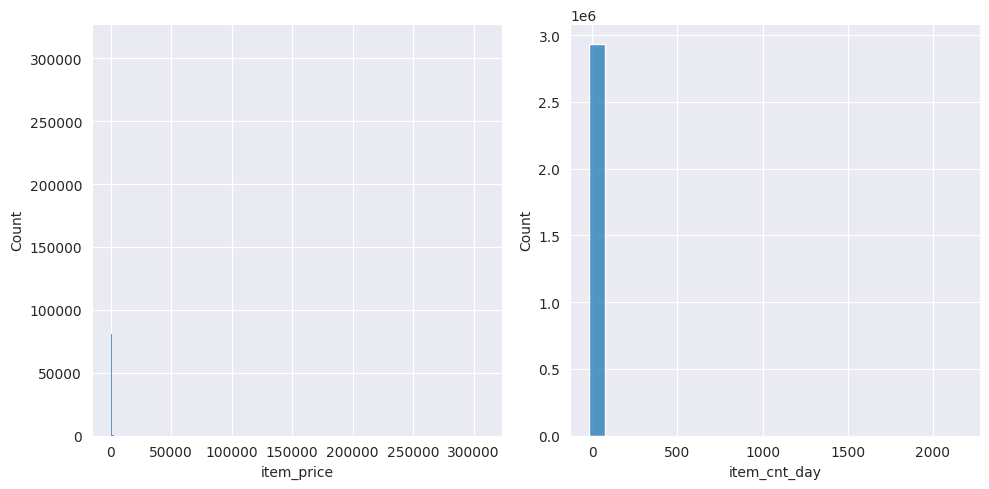

In [11]:
sales.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [12]:
sales_df = sales.dqc.get_data()

In [13]:
sales_df[sales_df['item_price'] < 1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.000000,1.0
531561,16.06.2013,5,30,11859,0.100000,1.0
531564,13.06.2013,5,30,11855,0.100000,1.0
531566,06.06.2013,5,30,11858,0.100000,1.0
531567,09.06.2013,5,30,11858,0.100000,1.0
...,...,...,...,...,...,...
2898267,02.10.2015,33,58,15334,0.990000,1.0
2898268,11.10.2015,33,58,15334,0.990000,1.0
2898269,01.10.2015,33,58,15344,0.990000,2.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


<font size = 3>

<b> One negative value, and a lot of not realistic price as 0.1</b>

</font>

In [14]:
sales_df[sales_df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


<font size = 3>

<b> A log of negative values in the item_cnt_day column</b>

</font>

<font size = 3>

**Shops**:

</font>

In [15]:
shops.dqc.statistic()

Information about data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


Some examples of data:

                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
5          Вологда ТРЦ "Мармелад"        5
6      Воронеж (Плехановская, 13)        6
7          Воронеж ТРЦ "Максимир"        7
8    Воронеж ТРЦ Сити-Парк "Град"        8
9               Выездная Торговля        9


Number of unique data:

shop_name    60
shop_id      60
dtype: int64


Number of dublicated data: 0


In [16]:
shops_df = shops.dqc.get_data()

In [17]:
shops_df[shops_df['shop_id'].isin([0, 1, 10, 11, 39, 40, 57, 58])]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
10,Жуковский ул. Чкалова 39м?,10
11,Жуковский ул. Чкалова 39м²,11
39,"РостовНаДону ТРК ""Мегацентр Горизонт""",39
40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",40
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58


<font size = 3>

<b> Duplicates in store names , need to change and delete these duplicates</b>

</font>

<font size = 3>

**Test**:

</font>

In [18]:
test.dqc.statistic()

Information about data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None


Some examples of data:

   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
5   5        5     5039
6   6        5     5041
7   7        5     5046
8   8        5     5319
9   9        5     5003


Number of unique data:

ID         214200
shop_id        42
item_id      5100
dtype: int64


Number of dublicated data: 0


In [19]:
test_df = test.dqc.get_data()
sales_df = sales.dqc.get_data()

In [20]:
unique_test_items = test_df['item_id'][~test_df['item_id'].isin(sales_df['item_id'].unique())].unique()
unique_test_shops = test_df['shop_id'][~test_df['shop_id'].isin(sales_df['shop_id'].unique())].unique()

In [21]:
print('Unique items in test: {}\nUnique shops in test: {}'.format(len(unique_test_items), len(unique_test_shops)))

Unique items in test: 363
Unique shops in test: 0


In [22]:
unique_train_items = sales_df['item_id'][~sales_df['item_id'].isin(test_df['item_id'].unique())].unique()
unique_train_shops = sales_df['shop_id'][~sales_df['shop_id'].isin(test_df['shop_id'].unique())].unique()

In [23]:
print('Unique items in train: {}\nUnique shops in train: {}'.format(len(unique_train_items), len(unique_train_shops)))

Unique items in train: 17070
Unique shops in train: 18


In [24]:
del item_categories, items, sales, shops, test

<font size = 3>

**Outliers with extreme values fix**:


</font>

In [25]:
sales = ETL(sales_path)

2935849 rows and 6 columns has been read from sales_train.csv


In [26]:
sales.dqc.train_fix(drop_extreme=True)

In [27]:
sales_z = copy.deepcopy(sales)
sales_forest = copy.deepcopy(sales)
sales_IQR = copy.deepcopy(sales)

In [28]:
sales_z.dqc.z_score(column='item_price', info=True)
sales_z.dqc.z_score(column='item_cnt_day', info=True)
sales_IQR.dqc.outlier_detect_IQR(columns=['item_price', 'item_cnt_day'], threshold=3, info=True)
sales_forest.dqc.isolation_forest(columns=['item_price', 'item_cnt_day'], info=True)


Z_score outliers detection:

Number of outliers in item_price: 28512
Outlier share in item_price: 0.974%


Z_score outliers detection:

Number of outliers in item_cnt_day: 17014
Outlier share in item_cnt_day: 0.581%


IQR outliers detection:

Number of outliers in item_price: 78356
Outlier share in item_price: 2.676%


IQR outliers detection:

Number of outliers in item_cnt_day: 299119
Outlier share in item_cnt_day: 10.214%


Isolation forest outliers detection:

Number of outliers: 315975
Outlier share: 10.79%



In [29]:
sales_z.dqc.z_score(column='item_price', info=True, change=True)
sales_z.dqc.z_score(column='item_cnt_day', info=True, change=True)
sales_IQR.dqc.outlier_detect_IQR(columns=['item_price', 'item_cnt_day'], info=True, change=True)
sales_forest.dqc.isolation_forest(columns=['item_price', 'item_cnt_day'], info=True, change=True)


Z_score outliers detection:

Number of outliers in item_price: 28512
Outlier share in item_price: 0.974%


Z_score outliers detection:

Number of outliers in item_cnt_day: 16774
Outlier share in item_cnt_day: 0.578%


IQR outliers detection:

Number of outliers in item_price: 78356
Outlier share in item_price: 2.676%



IQR outliers detection:

Number of outliers in item_cnt_day: 299119
Outlier share in item_cnt_day: 10.214%


Isolation forest outliers detection:

Number of outliers: 324828
Outlier share: 11.092%



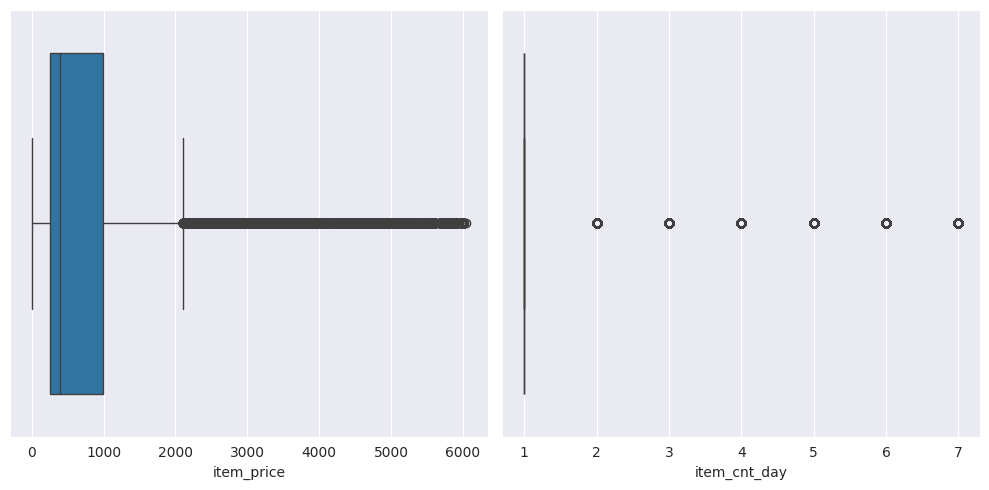

In [30]:
sales_z.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

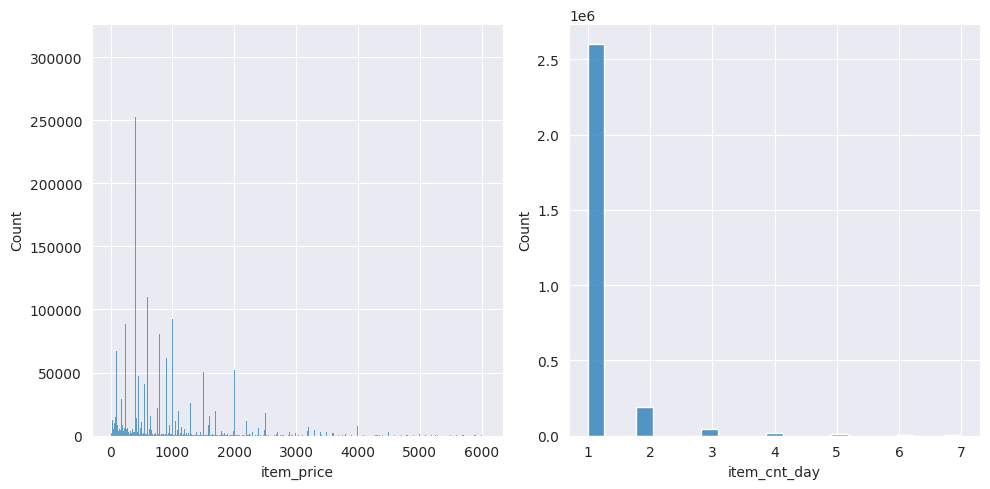

In [31]:
sales_z.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [32]:
sales_df = sales_z.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [33]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
531561,2013-06-16,5,30,11859,0.10,1.0
531564,2013-06-13,5,30,11855,0.10,1.0
531566,2013-06-06,5,30,11858,0.10,1.0
531567,2013-06-09,5,30,11858,0.10,1.0
531568,2013-06-14,5,30,11858,0.10,1.0
...,...,...,...,...,...,...
2898266,2015-10-01,33,58,15334,0.99,1.0
2898267,2015-10-02,33,58,15334,0.99,1.0
2898268,2015-10-11,33,58,15334,0.99,1.0
2898269,2015-10-01,33,58,15344,0.99,2.0


In [34]:
del sales_df

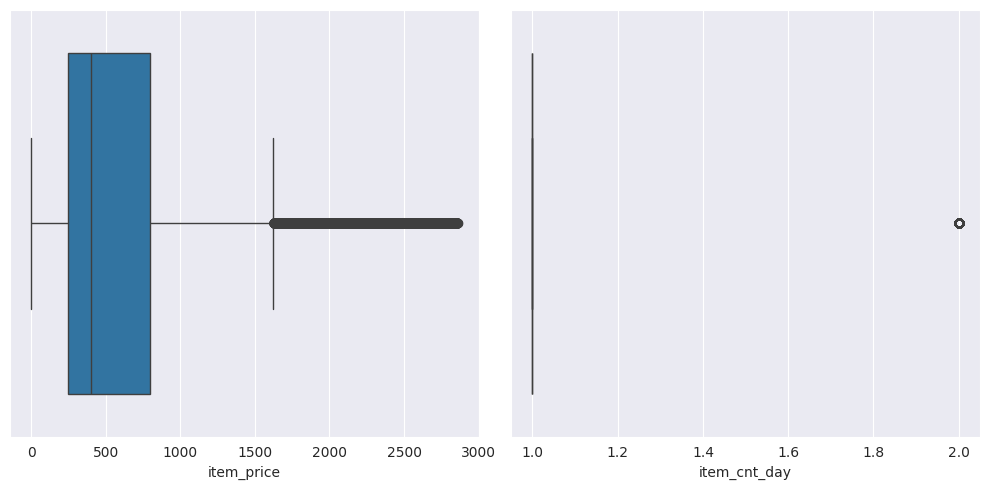

In [35]:
sales_forest.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

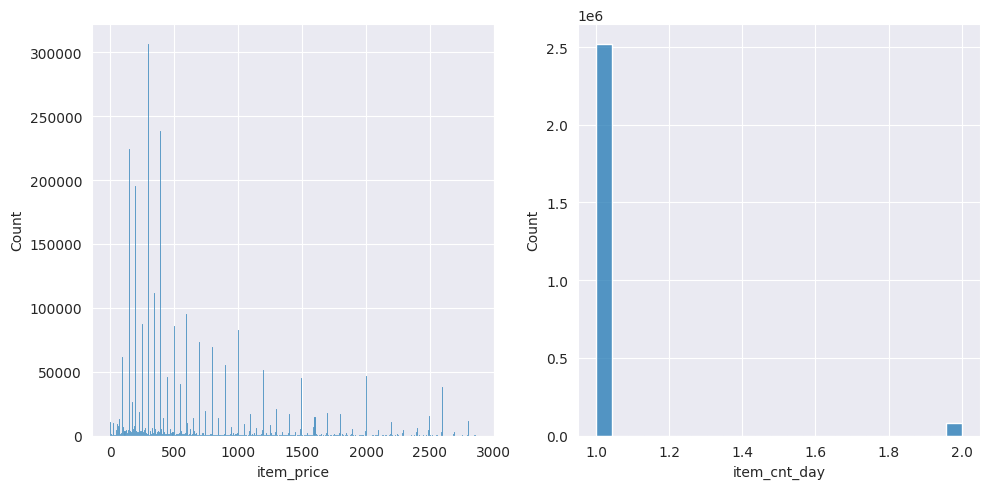

In [36]:
sales_forest.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [37]:
sales_df = sales_forest.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [38]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
531561,2013-06-16,5,30,11859,0.10,1.0
531564,2013-06-13,5,30,11855,0.10,1.0
531566,2013-06-06,5,30,11858,0.10,1.0
531567,2013-06-09,5,30,11858,0.10,1.0
531568,2013-06-14,5,30,11858,0.10,1.0
...,...,...,...,...,...,...
2885073,2015-10-01,33,44,15345,0.99,1.0
2898266,2015-10-01,33,58,15334,0.99,1.0
2898267,2015-10-02,33,58,15334,0.99,1.0
2898268,2015-10-11,33,58,15334,0.99,1.0


In [39]:
del sales_df

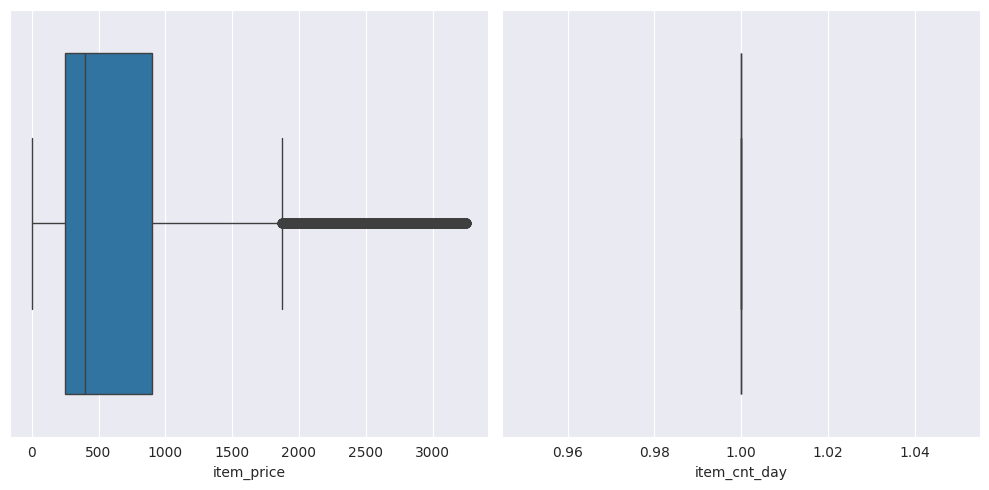

In [40]:
sales_IQR.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

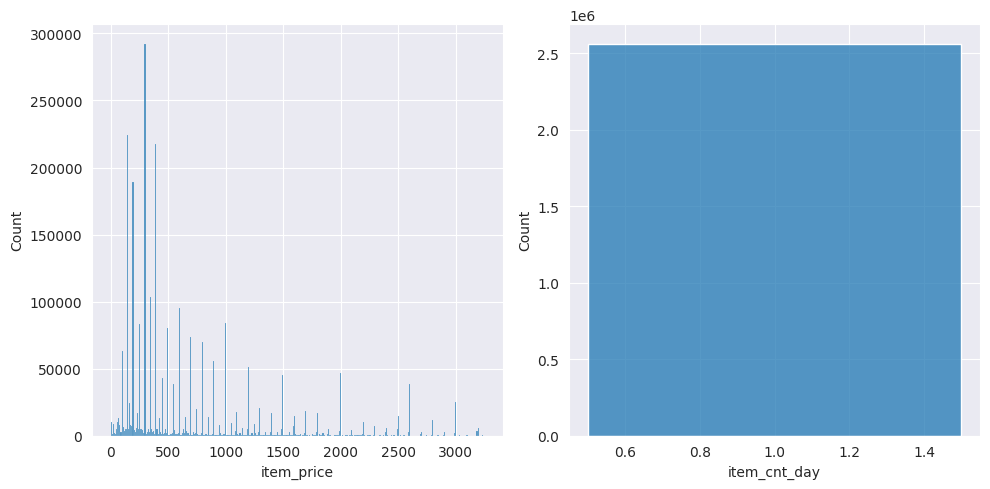

In [41]:
sales_IQR.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [42]:
sales_df = sales_IQR.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [43]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
531561,2013-06-16,5,30,11859,0.10,1.0
531564,2013-06-13,5,30,11855,0.10,1.0
531566,2013-06-06,5,30,11858,0.10,1.0
531567,2013-06-09,5,30,11858,0.10,1.0
531568,2013-06-14,5,30,11858,0.10,1.0
...,...,...,...,...,...,...
2885073,2015-10-01,33,44,15345,0.99,1.0
2898266,2015-10-01,33,58,15334,0.99,1.0
2898267,2015-10-02,33,58,15334,0.99,1.0
2898268,2015-10-11,33,58,15334,0.99,1.0


In [44]:
del sales_df, sales_IQR, sales_forest, sales_z, sales

<font size = 3>

**Outliers without extreme values fix**:


</font>

In [57]:
sales = ETL(sales_path)

2935849 rows and 6 columns has been read from sales_train.csv


In [58]:
sales.dqc.train_fix(drop_extreme=False)

In [59]:
sales_z = copy.deepcopy(sales)
sales_forest = copy.deepcopy(sales)
sales_IQR = copy.deepcopy(sales)

In [60]:
sales_z.dqc.z_score(column=['item_price'], info=True, change=True)
sales_z.dqc.z_score(column=['item_cnt_day'], info=True, change=True)
sales_forest.dqc.isolation_forest(columns=['item_price', 'item_cnt_day'], info=True, change=True)
sales_IQR.dqc.outlier_detect_IQR(columns=['item_price', 'item_cnt_day'], info=True, change=True)


Z_score outliers detection:

Number of outliers in ['item_price']: 28701
Outlier share in ['item_price']: 0.978%


Z_score outliers detection:

Number of outliers in ['item_cnt_day']: 11749
Outlier share in ['item_cnt_day']: 0.404%


Isolation forest outliers detection:

Number of outliers: 312640
Outlier share: 10.649%


IQR outliers detection:

Number of outliers in item_price: 78853
Outlier share in item_price: 2.686%



IQR outliers detection:

Number of outliers in item_cnt_day: 306477
Outlier share in item_cnt_day: 10.439%



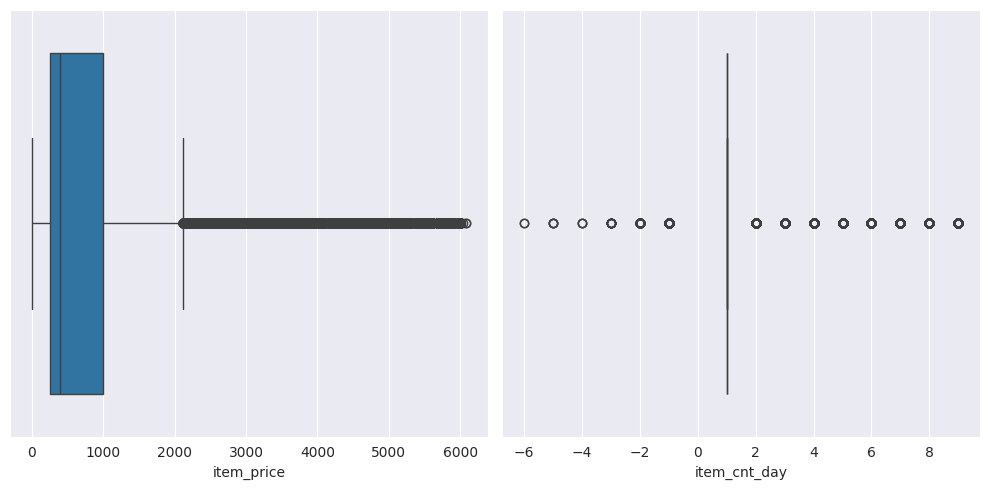

In [61]:
sales_z.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

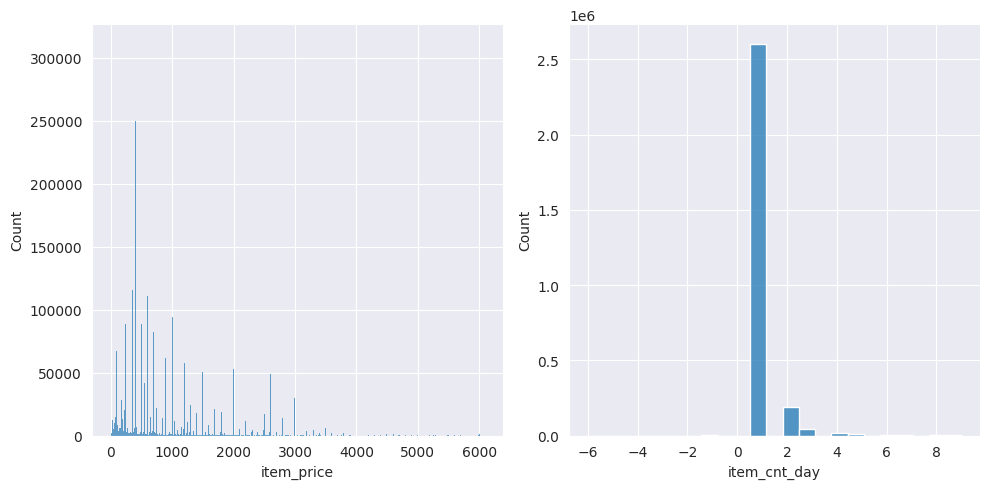

In [62]:
sales_z.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [63]:
sales_df = sales_z.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [64]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2933712,2015-10-03,33,25,14064,249.0,-1.0
2934243,2015-10-26,33,25,3917,449.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [65]:
del sales_df

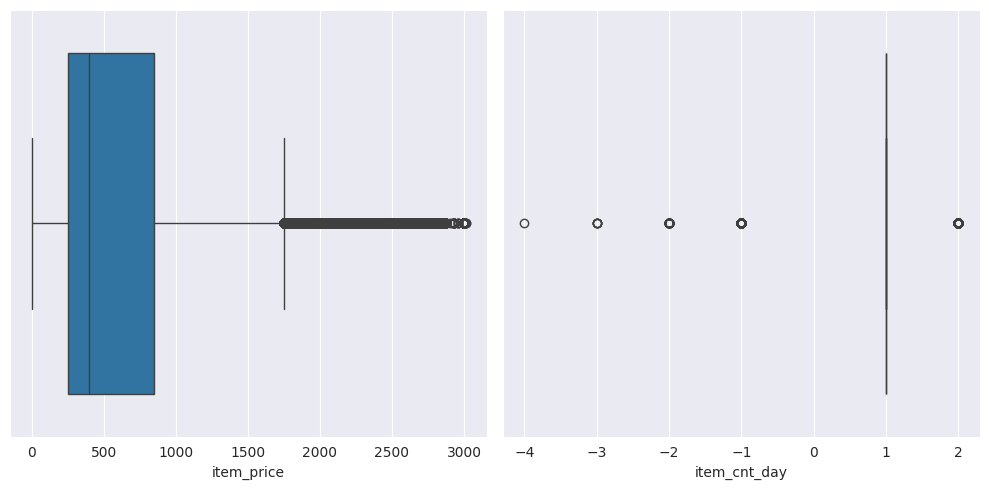

In [66]:
sales_forest.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

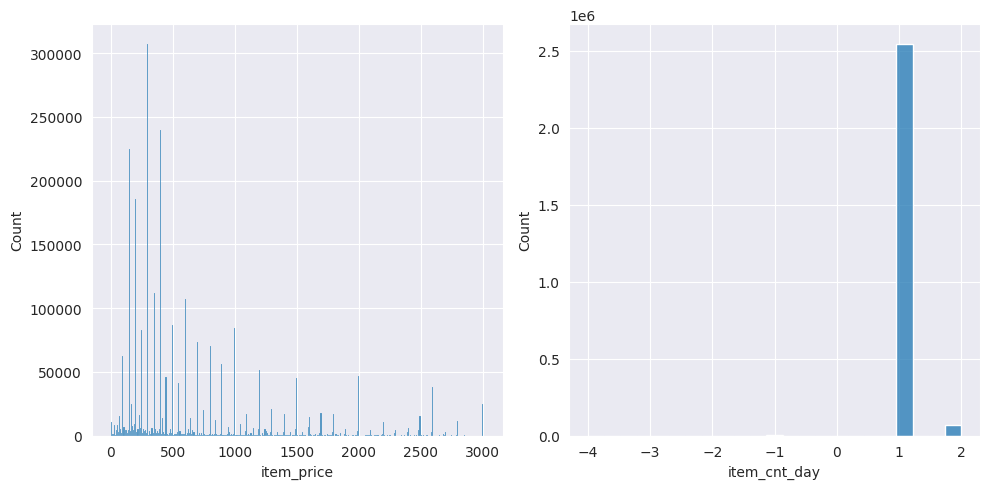

In [67]:
sales_forest.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [68]:
sales_df = sales_forest.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [69]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1674,2013-01-07,0,25,4093,899.0,-1.0
3216,2013-01-08,0,24,20948,899.0,-1.0
...,...,...,...,...,...,...
2932721,2015-10-28,33,25,13304,799.0,-1.0
2933712,2015-10-03,33,25,14064,249.0,-1.0
2934243,2015-10-26,33,25,3917,449.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0


In [70]:
del sales_df

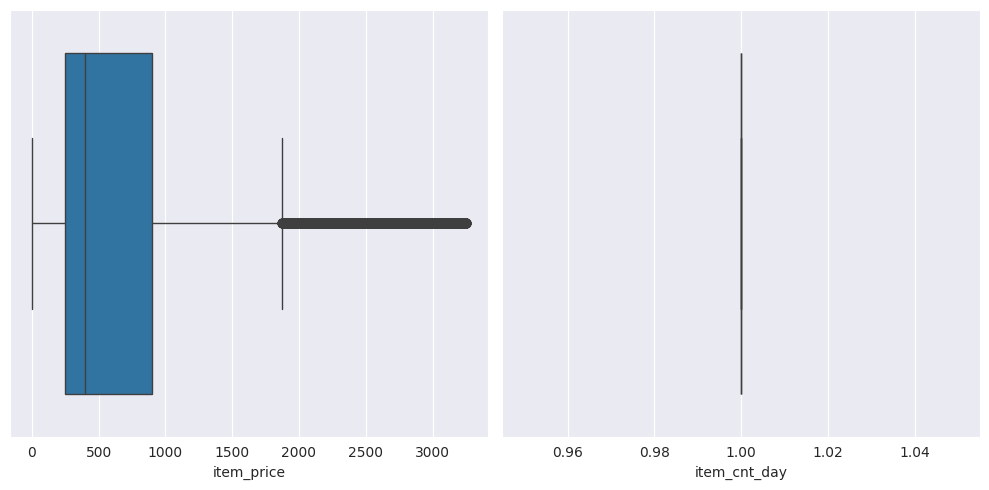

In [71]:
sales_IQR.dqc.boxplots(columns=['item_price', 'item_cnt_day'])

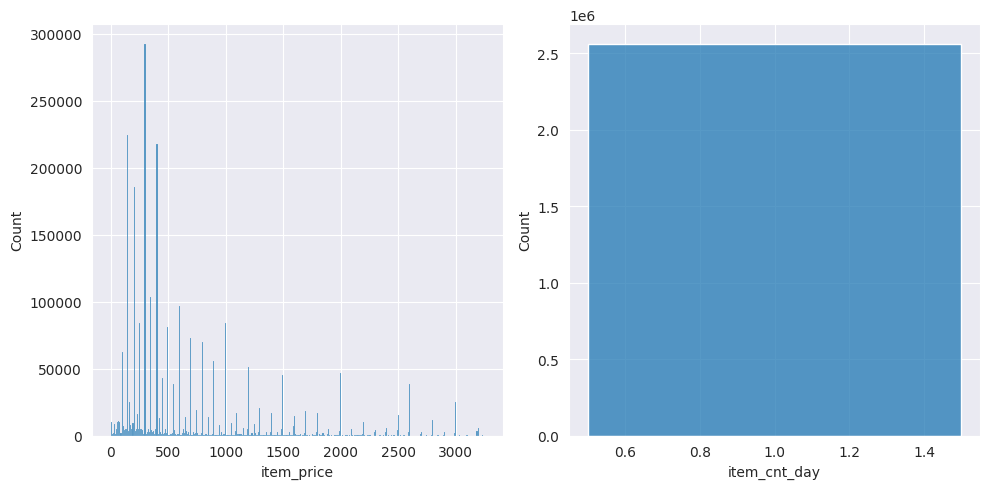

In [72]:
sales_IQR.dqc.histplots(columns=['item_price', 'item_cnt_day'])

In [73]:
sales_df = sales_forest.dqc.get_data()
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [74]:
sales_df[(sales_df['item_cnt_day'] < 0) | (sales_df['item_price'] < 1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1674,2013-01-07,0,25,4093,899.0,-1.0
3216,2013-01-08,0,24,20948,899.0,-1.0
...,...,...,...,...,...,...
2932721,2015-10-28,33,25,13304,799.0,-1.0
2933712,2015-10-03,33,25,14064,249.0,-1.0
2934243,2015-10-26,33,25,3917,449.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0


In [75]:
del  sales_df, sales_IQR, sales_forest, sales_z, sales

<font size = 3>

**Checking fixing columns**:


</font>

In [76]:
shops = ETL(shops_path)

60 rows and 2 columns has been read from shops.csv


In [77]:
shops.dqc.shop_fix()
shops.dqc.get_data()

,shop_name,shop_id,city
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная
11,Жуковский ул. Чкалова 39м²,11,Жуковский
12,Интернет-магазин ЧС,12,Интернет-магазин


In [78]:
items = ETL(items_path)

22170 rows and 3 columns has been read from items.csv


In [79]:
items.dqc.item_fix()
items_df = items.dqc.get_data()

In [80]:
items_df['cleaned_name'].duplicated().sum()

2690

In [81]:
item_categories = ETL(item_categories_path)

84 rows and 2 columns has been read from item_categories.csv


In [82]:
item_categories.dqc.item_category_fix()
item_categories.dqc.get_data()

,item_category_name,item_category_id,category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
...,...,...,...
79,Служебные,79,Служебные
80,Служебные - Билеты,80,Служебные
81,Чистые носители (шпиль),81,Чистые
82,Чистые носители (штучные),82,Чистые


In [83]:
del items, items_df
del item_categories
del shops

<font size = 3>

**Transforming data**:


</font>

In [2]:
item_categories = ETL(item_categories_path)
items = ETL(items_path)
sales = ETL(sales_path)
shops = ETL(shops_path)
test = ETL(test_path)

84 rows and 2 columns has been read from item_categories.csv
22170 rows and 3 columns has been read from items.csv
2935849 rows and 6 columns has been read from sales_train.csv
60 rows and 2 columns has been read from shops.csv
214200 rows and 3 columns has been read from test.csv


In [3]:
item_categories.transform_data('category')
items.transform_data('item')
sales.transform_data('train')
shops.transform_data('shop')
test.transform_data('test')

In [4]:
item_categories.get_data()

,item_category_name,item_category_id,category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
...,...,...,...
79,Служебные,79,Служебные
80,Служебные - Билеты,80,Служебные
81,Чистые носители (шпиль),81,Чистые
82,Чистые носители (штучные),82,Чистые


In [5]:
items.get_data()

,item_name,item_id,item_category_id,cleaned_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,во власти наваждения d
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,abbyy finereader 12 professional edition full
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,в лучах славы d
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,голубая волна d
4,***КОРОБКА (СТЕКЛО) D,4,40,коробка d
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,ядерный титбит 2
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,язык запросов 1спредприятия
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,язык запросов 1спредприятия 8 хрусталева ею
22168,Яйцо для Little Inu,22168,62,яйцо для little inu


In [6]:
sales.get_data()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [7]:
shops.get_data()

,shop_name,shop_id,city
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная
11,Жуковский ул. Чкалова 39м²,11,Жуковский
12,Интернет-магазин ЧС,12,Интернет-магазин


In [8]:
test.get_data()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [9]:
item_categories.load_data(file_name="item_categories_fix")
items.load_data(file_name="items_fix")
sales.load_data(file_name="sales_fix")
shops.load_data(file_name="shops_fix")
test.load_data(file_name="test_fix")

File item_categories_fix was successfully saved
File items_fix was successfully saved
File sales_fix was successfully saved
File shops_fix was successfully saved
File test_fix was successfully saved


In [10]:
del item_categories, items, sales, shops, test

<font size = 3>

TODO:
1) Придумать, что сделать со значениями цены, которая ниже 0.1, какойто месяц акции по ощущению произошёл в 2013.06. Сначала лучше всего оставить, посмотреть что по итогу будет на графике.
Как идея взять среднюю цену по этому продукту в другие месяца и заменить. ALERT!!! Ни в коем случае не удалять, пропадёт 1-2 месяца из данных.

2) Не все шопы , что есть в трейне - есть в тесте, не все товары, что есть в тесте - есть в трейне. Как идея можно просто выбросить эти 363 товара из теста. Трейн с уникальными товарами и шопами можно по идее не трогать, их не так много, обучение не ускорит

3) ALERT!!! не забыть после того как сделаю EDA, при соединении таблиц в одну дропнуть дубликаты. 2700 товаров повторяется, пока что не дропал, ведь там уникальные айдишники, пришлось бы менять всё в ручную. 

4) не забыть создать новых фич цены после EDA для обучения. Может точность модели возрастёт
</font>